<a href="https://colab.research.google.com/github/MakotoEndo8510/Qutip_expl/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Block Spehere animation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

!pip install ffmpeg
!pip install qutip
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz
from qutip.ipynbtools import plot_animation

%matplotlib inline

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=a7696fe4ad3219c4dcf4626acb877932cedc4619fbbc872ee9f5ddaebed6ddef
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    sm = sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5  # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)

    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
    return output

In [ ]:
w = 1.0 * 2 * np.pi  # qubit angular frequency
theta = 0.2 * np.pi  # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5  # qubit relaxation rate
gamma2 = 0.2  # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a * basis(2, 0) + (1 - a) * basis(2, 1)) / \
        (np.sqrt(a**2 + (1 - a) ** 2))
tlist = np.linspace(0, 4, 150)

In [ ]:
result = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [ ]:
result = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)
def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes

In [ ]:
sphere = None


def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.make_sphere()

    return axes.artists

In [24]:
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

## Closed Landau-Zener Evolution

In [26]:
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

In [27]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect

## Generation of a Bloch Sphere with multi-colored points

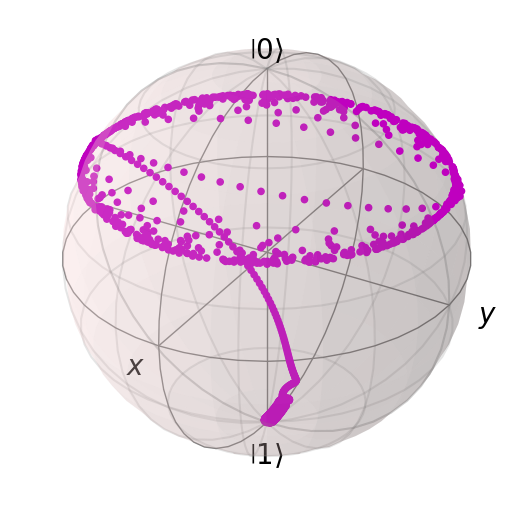

In [42]:
b = Bloch()
# normalize colors to times in tlist ##
#nrm = plt.colors.Normalize(-2, 10)
#colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = ["m"]
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()